In [11]:
import pandas as pd
from collections import Counter

# Load the dataset
df = pd.read_csv("datasetproject.csv")

# Fill missing values in the 'Cuisines' column
df['Cuisines'] = df['Cuisines'].fillna('Unknown')

# Split cuisines and count frequencies
all_cuisines = df['Cuisines'].str.split(', ')
cuisine_counts = Counter([cuisine for sublist in all_cuisines for cuisine in sublist])

# Get the top 3 cuisines
top_3_cuisines = cuisine_counts.most_common(3)

print("Top 3 Cuisines:")
for cuisine, count in top_3_cuisines:
    print(f"{cuisine}: {count}")


Top 3 Cuisines:
North Indian: 3960
Chinese: 2735
Fast Food: 1986


In [12]:
import pandas as pd

# Load the dataset
df = pd.read_csv("datasetproject.csv")

# Count the number of restaurants per city
city_counts = df['City'].value_counts()

# Get the city with the highest number of restaurants
top_city = city_counts.idxmax()
top_city_count = city_counts.max()

print(f"City with the highest number of restaurants: {top_city} ({top_city_count} restaurants)")


City with the highest number of restaurants: New Delhi (5473 restaurants)


In [13]:
import pandas as pd
from collections import Counter

# Load the dataset
df = pd.read_csv("datasetproject.csv")

# Handle missing values in 'Cuisines'
df['Cuisines'] = df['Cuisines'].fillna('Unknown')

# Split and count all cuisines
all_cuisines = df['Cuisines'].str.split(', ')
cuisine_counts = Counter([cuisine for sublist in all_cuisines for cuisine in sublist])

# Get top 3 cuisines
top_3 = [cuisine for cuisine, count in cuisine_counts.most_common(3)]

# Check how many restaurants serve at least one of the top 3 cuisines
is_top_cuisine = df['Cuisines'].apply(lambda x: any(cuisine in x for cuisine in top_3))
percentage_top_cuisine = (is_top_cuisine.sum() / len(df)) * 100

print(f"Percentage of restaurants serving top cuisines: {percentage_top_cuisine:.2f}%")


Percentage of restaurants serving top cuisines: 64.74%


In [14]:
# Average rating per city
avg_rating_per_city = df.groupby('City')['Aggregate rating'].mean()
print(avg_rating_per_city)


City
Abu Dhabi          4.300000
Agra               3.965000
Ahmedabad          4.161905
Albany             3.555000
Allahabad          3.395000
                     ...   
Weirton            3.900000
Wellington City    4.250000
Winchester Bay     3.200000
Yorkton            3.300000
��stanbul          4.292857
Name: Aggregate rating, Length: 141, dtype: float64


In [15]:
top_avg_rating_city = avg_rating_per_city.idxmax()
top_avg_rating = avg_rating_per_city.max()
print(f"City with highest average rating: {top_avg_rating_city} ({top_avg_rating:.2f})")


City with highest average rating: Inner City (4.90)


Matplotlib is building the font cache; this may take a moment.


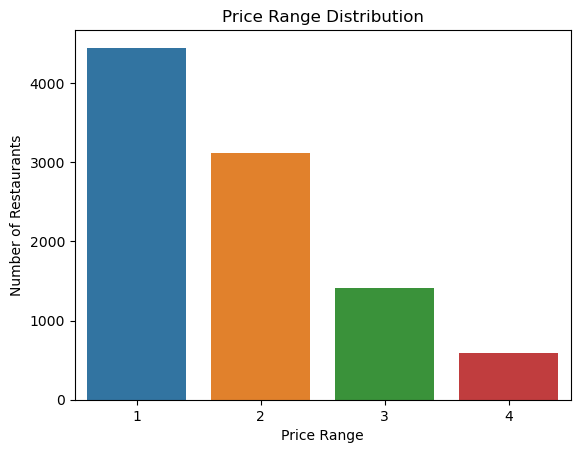

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='Price range', data=df)
plt.title('Price Range Distribution')
plt.xlabel('Price Range')
plt.ylabel('Number of Restaurants')
plt.show()


In [17]:
price_percent = df['Price range'].value_counts(normalize=True) * 100
print(price_percent)


Price range
1    46.529159
2    32.593446
3    14.741912
4     6.135483
Name: proportion, dtype: float64


In [18]:
df['Has Online delivery'] = df['Has Online delivery'].map({'Yes': 1, 'No': 0})
online_delivery_percent = df['Has Online delivery'].mean() * 100
print(f"Percentage offering online delivery: {online_delivery_percent:.2f}%")


Percentage offering online delivery: 25.66%


In [19]:
avg_rating_delivery = df.groupby('Has Online delivery')['Aggregate rating'].mean()
print(avg_rating_delivery)


Has Online delivery
0    2.465296
1    3.248837
Name: Aggregate rating, dtype: float64


In [20]:
bins = [0, 1, 2, 3, 4, 5]
labels = ['0–1', '1–2', '2–3', '3–4', '4–5']
df['Rating Range'] = pd.cut(df['Aggregate rating'], bins=bins, labels=labels, right=False)
rating_dist = df['Rating Range'].value_counts().sort_index()
print("Rating distribution:\n", rating_dist)
print("Most common rating range:", rating_dist.idxmax())


Rating distribution:
 Rating Range
0–1    2148
1–2       3
2–3    1430
3–4    4590
4–5    1380
Name: count, dtype: int64
Most common rating range: 3–4


In [21]:
avg_votes = df['Votes'].mean()
print(f"Average number of votes: {avg_votes:.2f}")


Average number of votes: 156.91


In [22]:
most_common_combo = df['Cuisines'].value_counts().idxmax()
print("Most common cuisine combination:", most_common_combo)


Most common cuisine combination: North Indian


In [23]:
top_cuisine_ratings = df.groupby('Cuisines')['Aggregate rating'].mean().sort_values(ascending=False).head(10)
print("Top-rated cuisine combinations:\n", top_cuisine_ratings)


Top-rated cuisine combinations:
 Cuisines
American, Coffee and Tea           4.9
American, Caribbean, Seafood       4.9
BBQ, Breakfast, Southern           4.9
European, Asian, Indian            4.9
American, Sandwich, Tea            4.9
Burger, Bar Food, Steak            4.9
Mughlai, Lucknowi                  4.9
Mexican, American, Healthy Food    4.9
Italian, Deli                      4.9
Continental, Indian                4.9
Name: Aggregate rating, dtype: float64
